# Homework 8
Eric Gagliano (egagli)

## Problem 1: Air Temperature Observations in Complex Terrain

### A. Plot the temperature observations (AIR_TEMPERATURE) at all sites on one plot over time; use the title, xlabel, and ylabel commands to label your plot and its axes. Use xlim to zoom in and examine the data at finer scales. Qualitatively describe the dataset, including its minimum and maximum values, its major variability in time, and how correlated the stations appear to be with one another. (you do not need to actually compute correlation coefficents here, just describe it qualitatively)

In [1]:
!pip install geopandas

  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
  Using cached Fiona-1.8.20-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (15.4 MB)
  Using cached pyproj-3.3.0-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (5.8 MB)
  Using cached Shapely-1.8.0-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.1 MB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)


In [2]:
#imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import geopandas as gpd 
%matplotlib inline

# SVD function from scipy
from scipy.linalg import svd

# we'll use scipy's IO library and datetime to read .mat files
import scipy.io as sio 
import datetime as dt

Optional: Download North_Fork_American_River_CA_18020128.json to add the American River watershed outline to your plots.

In [3]:
watershed = gpd.read_file('North_Fork_American_River_CA_18020128.json')

<AxesSubplot:>

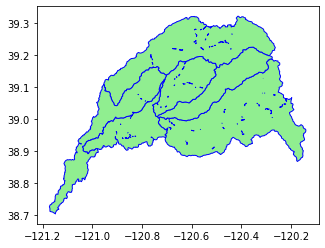

In [4]:
# plot the watershed shapefile
watershed.plot(linestyle='-', edgecolor='blue', color='lightgreen')

In [5]:
# load the ibutton data
data = sio.loadmat('iButtons_2008-2010.mat')

# convert matlab format dates to python datetimes
datenums = data['TIME'][:,0]
dates = [dt.datetime.fromordinal(int(d)) + dt.timedelta(days=d%1) - dt.timedelta(days = 366) for d in datenums]

# Unpack the rest of the data
SITE_NAMES = [name[0][0] for name in data['SITE_NAMES']]
SITE_LATS = data['SITE_LATS'][:,0]
SITE_LONS = data['SITE_LONS'][:,0]
SITE_ELEVS = data['SITE_ELEVS'][:,0]
AIR_TEMPERATURE = data['AIR_TEMPERATURE']
AIR_TEMPERATURE_ZEROMEAN = data['AIR_TEMPERATURE_ZEROMEAN']

nt = data['nt'][0][0] # size in the t dimension
nx = data['nx'][0][0] # size in the x dimension (number of sites)

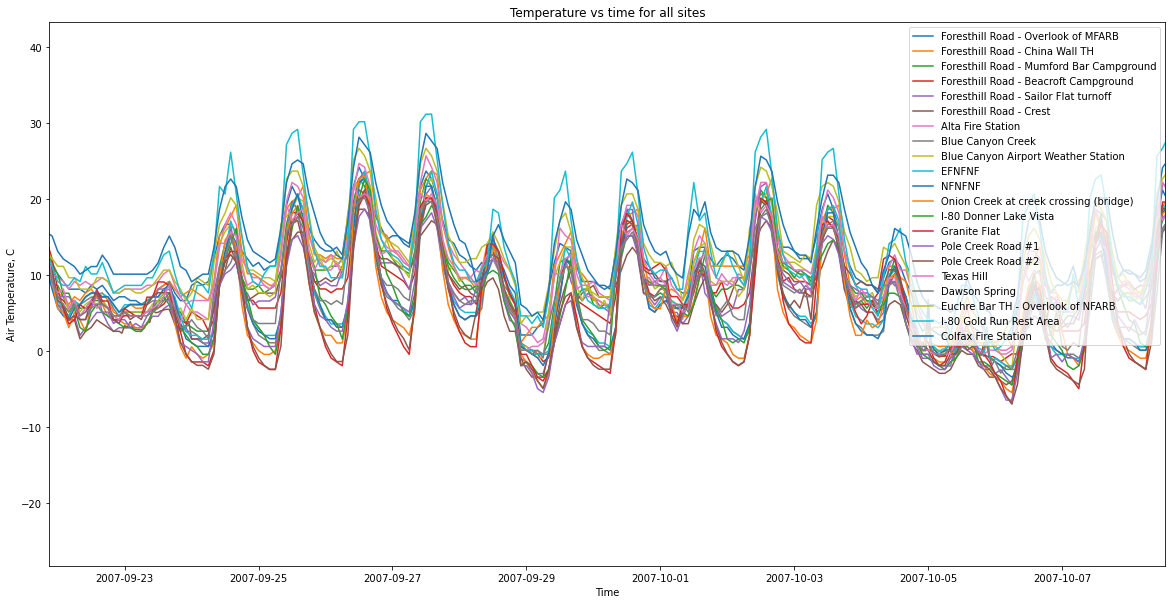

In [6]:
f, ax = plt.subplots(figsize=(20,10))

for site in range(21):
    plt.plot(dates,AIR_TEMPERATURE[:,site],label=SITE_NAMES[site])
plt.legend(loc='best')
plt.ylabel('Air Temperature, C')
plt.xlabel('Time');
plt.title('Temperature vs time for all sites'); # add a title

# use xlim to set x axis limits to zoom in
# comment xlim out to plot the entire timeseries
plt.xlim((dates[100], dates[500])); 

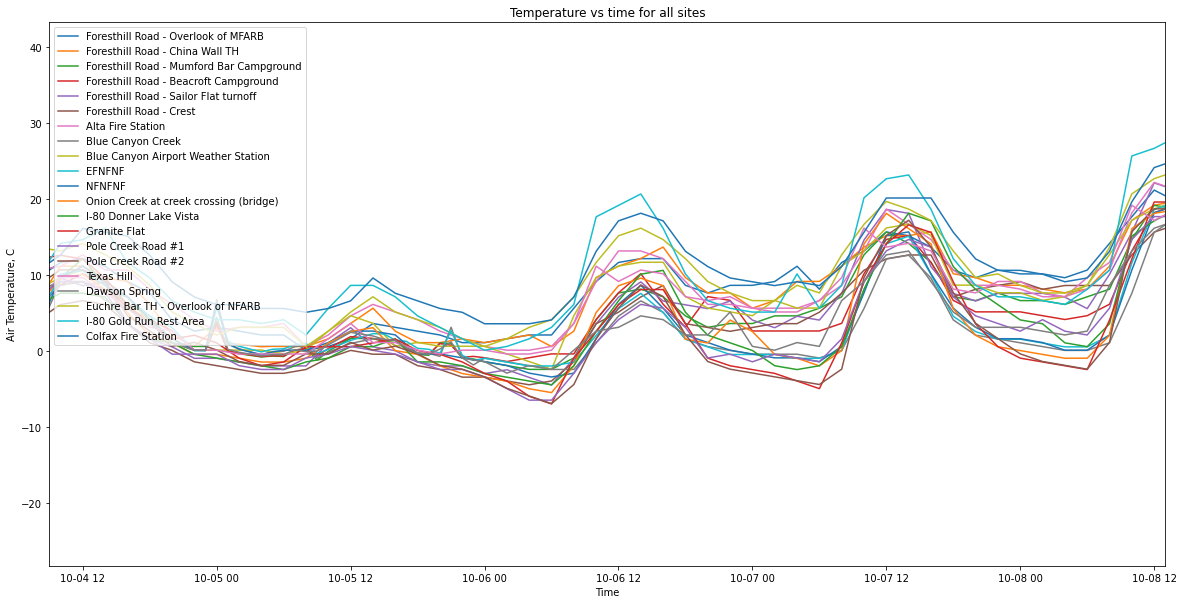

In [7]:
f, ax = plt.subplots(figsize=(20,10))

for site in range(21):
    plt.plot(dates,AIR_TEMPERATURE[:,site],label=SITE_NAMES[site])
plt.legend(loc='best')
plt.ylabel('Air Temperature, C')
plt.xlabel('Time');
plt.title('Temperature vs time for all sites') # add a title

# use xlim to set x axis limits to zoom in
# comment xlim out to plot the entire timeseries
plt.xlim((dates[400], dates[500])); 

This dataset seems to have a strong regular periodicity to it with a frequency of about one day. All of the stations seem to be very correlated with each other in both frequencies and amplitudes. For September-October in 2007, the minimum temperature is about $-8^\circ C$ and the maximum temperature is about $30^\circ C$.

### B. Use the command: [U,S,V] = scipy.linalg.svd(AIR_TEMPERATURE_ZEROMEAN, full_matrices=False) (read the documentation for this function here) to calculate the PCs, variances, and EOFs, respectively, of AIR_TEMPERATURE_ZEROMEAN (this is a version of the dataset where the mean temperature at each station has been subtracted out). Describe, qualitatively, how the variance is distributed among the patterns; how much is described by the leading pattern? By the second pattern?

In [8]:
[U,S,V] = svd(AIR_TEMPERATURE_ZEROMEAN, full_matrices=False)

In [9]:
variances = S/S.sum()
for i in range(len(variances)):
    print(f'The variance explained by EOF {i+1} is {variances[i]*100:.5} %')

The variance explained by EOF 1 is 54.16 %
The variance explained by EOF 2 is 9.3145 %
The variance explained by EOF 3 is 5.0655 %
The variance explained by EOF 4 is 4.5899 %
The variance explained by EOF 5 is 3.16 %
The variance explained by EOF 6 is 2.4138 %
The variance explained by EOF 7 is 2.2727 %
The variance explained by EOF 8 is 1.9373 %
The variance explained by EOF 9 is 1.7662 %
The variance explained by EOF 10 is 1.6901 %
The variance explained by EOF 11 is 1.611 %
The variance explained by EOF 12 is 1.4832 %
The variance explained by EOF 13 is 1.4035 %
The variance explained by EOF 14 is 1.3624 %
The variance explained by EOF 15 is 1.2699 %
The variance explained by EOF 16 is 1.2017 %
The variance explained by EOF 17 is 1.1607 %
The variance explained by EOF 18 is 1.0867 %
The variance explained by EOF 19 is 1.0711 %
The variance explained by EOF 20 is 1.0187 %
The variance explained by EOF 21 is 0.96082 %


Text(0.5, 0, 'Variance Explained')

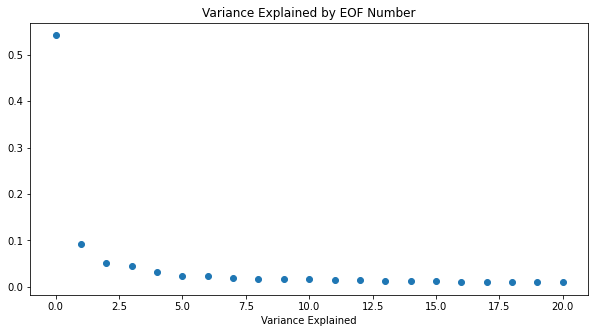

In [35]:
f,ax=plt.subplots(figsize=(10,5))
ax.scatter(range(len(variances)),variances)
ax.set_title('Variance Explained by EOF Number')
ax.set_xlabel('EOF Number')
ax.set_xlabel('Variance Explained')

The first pattern explains 54.16% of the variance, and the second pattern explains 9% of the variance! See the rest of the patterns and their respective variance explained above.

### C. Plot the leading pattern's spatial weights (EOF) against latitude and longitude. Describe the first pattern's spatial weights' sign and variability.

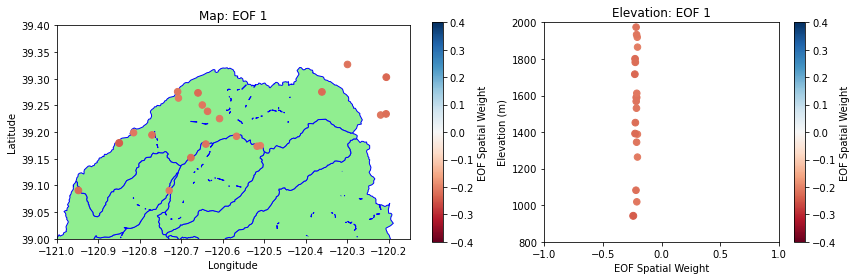

In [10]:
i = 0 # select the first EOF

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4), gridspec_kw={'width_ratios': [3, 2]}, tight_layout=True)

# OPTIONAL plot the watershed shapefile
watershed.plot(linestyle='-', edgecolor='blue', color='lightgreen',ax=ax[0])
# Make a scatter plot
points = ax[0].scatter(SITE_LONS,SITE_LATS,     # use longitude and latitude as the x and y values
                       c=V[i,:],                # set the color map value from V
                       s=np.abs(V[i,:]*200),    # also set the size of the marker from abs(V) (x200 to make it easier to see)
                       marker='o',cmap='RdBu',vmin=-0.4,vmax=0.4)      # set min and max for color map values

# Add labels and format the scatterplot
plt.colorbar(points, label='EOF Spatial Weight', ax=ax[0]) # add a colorbar and label it
ax[0].set_title('Map: EOF {}'.format(i+1)) # add a title
ax[0].set_xlabel('Longitude') # x axis label
ax[0].set_ylabel('Latitude'); # y axis label

# set up axes limits to zoom in to our points
ax[0].set_xlim((-121, -120.15))
ax[0].set_ylim((39.0,39.4))

# Plot EOF value versus elevation
points = ax[1].scatter(V[i,:],SITE_ELEVS,     # use longitude and latitude as the x and y values
                       c=V[i,:],                # set the color map value from V
                       s=np.abs(V[i,:]*200),    # also set the size of the marker from abs(V) (x200 to make it easier to see)
                       marker='o',cmap='RdBu',vmin=-0.4,vmax=0.4)      # set min and max for color map values

# Add labels and format the scatterplot
plt.colorbar(points, label='EOF Spatial Weight', ax=ax[1]) # add a colorbar and label it
ax[1].set_title('Elevation: EOF {}'.format(i+1)) # add a title
ax[1].set_xlabel('EOF Spatial Weight') # x axis label
ax[1].set_ylabel('Elevation (m)'); # y axis label

# set up axes limits to zoom in to our points
ax[1].set_xlim((-1, 1))
ax[1].set_ylim((800,2000));

It looks as if the first pattern's spatial weights are negative with a magnitude of between 0.21-0.24. Generally, it seems as elevation increases, there is a very very tiny increase in spatial weight.

### D. Plot the leading pattern's temporal weights (PCs) over time. When are they positive and when are they negative? Consider the PCs' sign and magnitude, and consider the sign of the EOF in Part C. When does this pattern generate warmer-than-normal temperatures? Colder-than-normal temperatures? Are the anomalies associated with this pattern of the same sign at all sites?

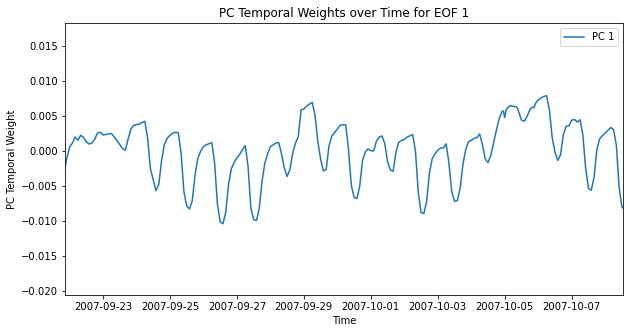

In [11]:
i = 0 # select the first PC

plt.figure(figsize=(10,5))
plt.plot(dates,U[:,i],
         label='PC {}'.format(i+1))
plt.xlim((dates[100], dates[500]))
plt.title('PC Temporal Weights over Time for EOF {}'.format(i+1)) # add a title

plt.legend()
plt.ylabel('PC Temporal Weight')
plt.xlabel('Time');

The temporal weights of the first pattern are more frequently negative in time with a range between -0.01 and 0.01. The values are higher during the night and peak around midnight, and the values are lower during the day and peak around noon. This pattern would generate warmer than normal temperatures during the day and lower than normal temperatures at night. The anomalies assosciated with this pattern is the same sign for all sites.

### E. Repeat C) and D) for the 2nd-leading pattern. Interpret physically what the first two patterns may represent. How much of the dataset is described by the first two modes of variability?

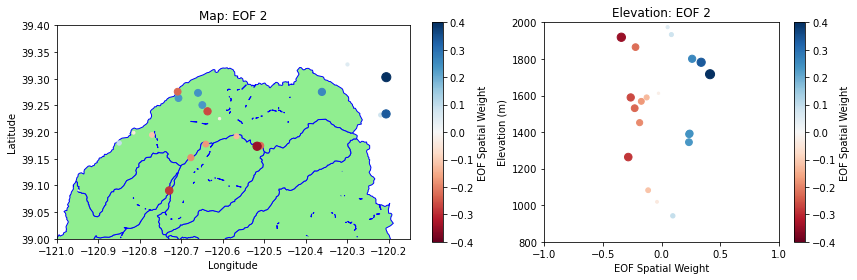

In [12]:
i = 1 # select the first EOF

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4), gridspec_kw={'width_ratios': [3, 2]}, tight_layout=True)

# OPTIONAL plot the watershed shapefile
watershed.plot(linestyle='-', edgecolor='blue', color='lightgreen', ax=ax[0])

# Make a scatter plot
points = ax[0].scatter(SITE_LONS,SITE_LATS,     # use longitude and latitude as the x and y values
                       c=V[i,:],                # set the color map value from V
                       s=np.abs(V[i,:]*200),    # also set the size of the marker from abs(V) (x200 to make it easier to see)
                       marker='o',cmap='RdBu',vmin=-0.4,vmax=0.4)      # set min and max for color map values

# Add labels and format the scatterplot
plt.colorbar(points, label='EOF Spatial Weight', ax=ax[0]) # add a colorbar and label it
ax[0].set_title('Map: EOF {}'.format(i+1)) # add a title
ax[0].set_xlabel('Longitude') # x axis label
ax[0].set_ylabel('Latitude'); # y axis label

# set up axes limits to zoom in to our points
ax[0].set_xlim((-121, -120.15))
ax[0].set_ylim((39.0,39.4))

# Plot EOF value versus elevation
points = ax[1].scatter(V[i,:],SITE_ELEVS,     # use longitude and latitude as the x and y values
                       c=V[i,:],                # set the color map value from V
                       s=np.abs(V[i,:]*200),    # also set the size of the marker from abs(V) (x200 to make it easier to see)
                       marker='o',cmap='RdBu',vmin=-0.4,vmax=0.4)      # set min and max for color map values

# Add labels and format the scatterplot
plt.colorbar(points, label='EOF Spatial Weight', ax=ax[1]) # add a colorbar and label it
ax[1].set_title('Elevation: EOF {}'.format(i+1)) # add a title
ax[1].set_xlabel('EOF Spatial Weight') # x axis label
ax[1].set_ylabel('Elevation (m)'); # y axis label

# set up axes limits to zoom in to our points
ax[1].set_xlim((-1, 1))
ax[1].set_ylim((800,2000));

It looks as if the second pattern's spatial weights are evenly distributed around 0 with a range of -0.4-0.4. Generally, there seems to be two seperate groups of points that both increase in magnitude with elevation, albeit with different signs. This makes me think there are two distinct groupings of points.

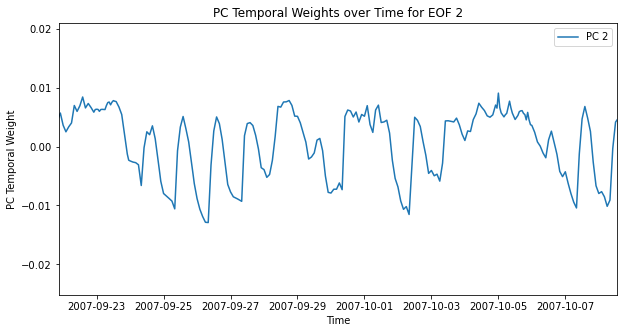

In [13]:
i = 1 # select the first PC

plt.figure(figsize=(10,5))
plt.plot(dates,U[:,i],
         label='PC {}'.format(i+1))
plt.xlim((dates[100], dates[500]))
plt.title('PC Temporal Weights over Time for EOF {}'.format(i+1)) # add a title
plt.legend()
plt.ylabel('PC Temporal Weight')
plt.xlabel('Time');

The temporal weights of the second pattern are more frequently negative in time with a range between -0.01 and 0.01. The values are higher and lower for specific strings of days and there is no consistent daily trend. The anomalies assosciated with this pattern are different signs for different sites.

My best guess is that the first pattern represents time of day because of its regulairty in temporal weights and relative stability in spatial location. For the second pattern, I would guess perhaps aspect because of the two different groupings of elevation dependent points. These first two patterns account for 54.16 + 9.32 = 63.48% of the variance in the dataset. 

## Problem 2: Timeseries Analysis

Following lab 8-2, use Fourier Analysis to determine the dominant frequencies and periods of oscilliation of the water level data provided (waterlevel.mat). Based on what you find, where (in what type of environment) do you think this water level was measured?

###  A. Plot the data and zoom in to see what's going on

In [14]:
# imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# we'll use scipy's IO library to read .mat files
import scipy.io as sio 

In [15]:
def power_spectral_density(x, sf):
    # perform fft on x
    f = np.fft.fft(x)
    
    # take absolute value to "fold over" power for PSD (but only take the first half, positive frequencies)
    p = np.abs(f[:f.size//2]) 
    
    # Create freq array 
    _freq = np.fft.fftfreq(f.size, sf)
    # (but only take the first half, positive frequencies)
    freq = _freq[:_freq.size//2]
    return freq, p

In [16]:
data = sio.loadmat('waterlevel.mat')

In [17]:
time = data['t'][0] # time, in days
level = data['Level'][0] # water level data, in cm
N = data['N'][0][0] # number of data points
sf = data['sf'][0][0] # sampling frequency, in hours

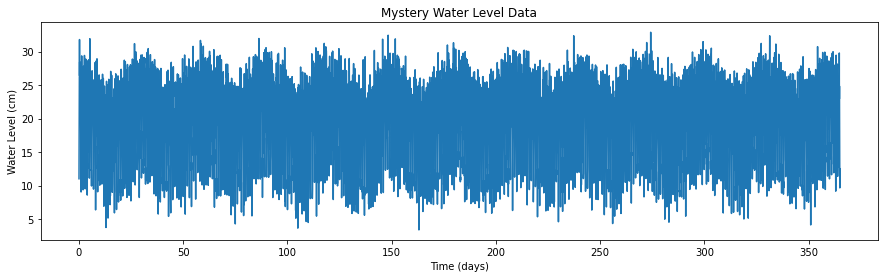

In [18]:
plt.figure(figsize=(15,4))
plt.plot(time,level)
plt.xlabel('Time (days)')
plt.ylabel('Water Level (cm)')
plt.title('Mystery Water Level Data');

(0.0, 10.0)

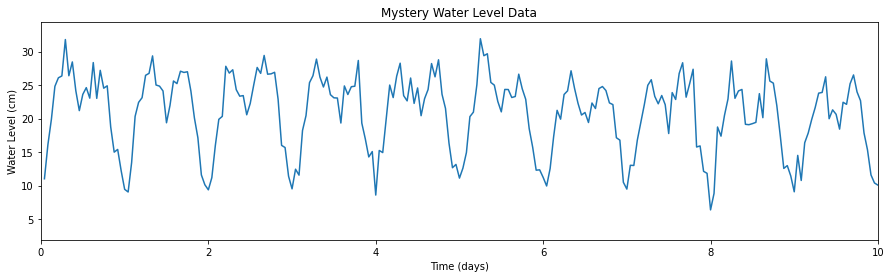

In [19]:
plt.figure(figsize=(15,4))
plt.plot(time,level)
plt.xlabel('Time (days)')
plt.ylabel('Water Level (cm)')
plt.title('Mystery Water Level Data')
plt.xlim([0,10])

### B. Use the timeseries analysis techniques we've discussed to plot the spectral density of this data. Do this both for the entire timeseries and for four equal-sized chunks of the data.

In [20]:
# fft of Qsum
sf = 24
Cns = np.fft.fft(level)
N = len(level) # make sure it's even
print(N)
p = np.abs(Cns[:N//2]) # take absolute value to "fold over" power for PSD (but only take the first half, positive frequencies)

# Create freq array (but only take the first half, positive frequencies)
_freq = np.fft.fftfreq(Cns.size, 1/sf)
freq = _freq[:N//2]

8760


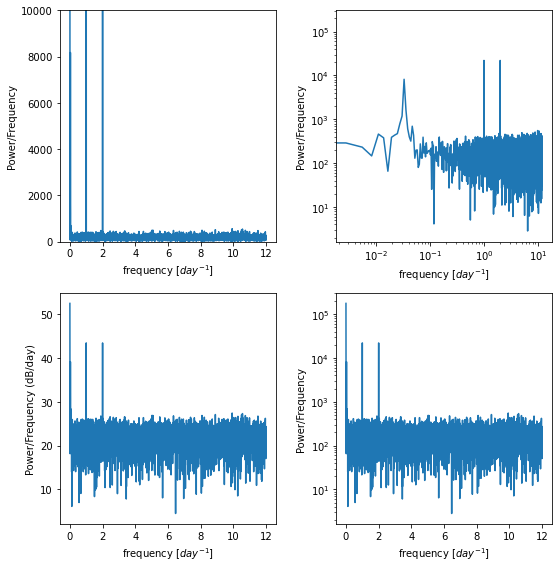

In [21]:
f, ax = plt.subplots(2,2,figsize=(8,8))
ax[0,0].plot(freq,p)
ax[0,0].set_ylim((0,10000)) # zoom in on the y axis
ax[0,0].set_ylabel('Power/Frequency')
ax[0,0].set_xlabel('frequency [$day^{-1}$]')

ax[0,1].plot(freq,p)
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].set_ylabel('Power/Frequency')
ax[0,1].set_xlabel('frequency [$day^{-1}$]')


ax[1,0].plot(freq,10*np.log10(p))
ax[1,0].set_ylabel('Power/Frequency (dB/day)')
ax[1,0].set_xlabel('frequency [$day^{-1}$]')

ax[1,1].plot(freq,p)
ax[1,1].set_yscale('log')
ax[1,1].set_ylabel('Power/Frequency')
ax[1,1].set_xlabel('frequency [$day^{-1}$]')

plt.tight_layout()

In [22]:
winsize = 4380 # I chose this as 1/4th of a year sampled hourly, but you could change, just be even
nwin = np.floor(N/winsize)
xx = np.reshape(level,(int(winsize),int(nwin)),order='F')

In [23]:
Pwin = np.zeros((int(winsize/2), int(nwin)))

# Peform fft on each of the subsets of the total timeseries
for m in range(int(nwin)):
    fwin , Pwin[:,m] = power_spectral_density(xx[:,m],1/sf);  
    
p_mean = np.mean(Pwin,axis=1)

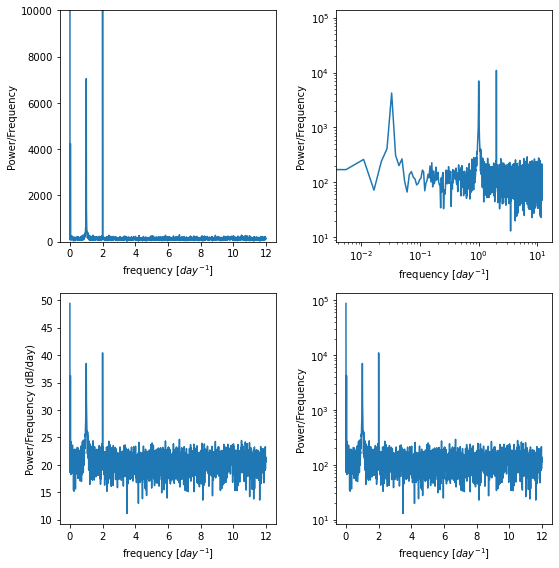

In [24]:
f, ax = plt.subplots(2,2,figsize=(8,8))
ax[0,0].plot(fwin,p_mean)
ax[0,0].set_ylim((0,10000)) # zoom in on the y axis
ax[0,0].set_ylabel('Power/Frequency')
ax[0,0].set_xlabel('frequency [$day^{-1}$]')

ax[0,1].plot(fwin,p_mean)
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].set_ylabel('Power/Frequency')
ax[0,1].set_xlabel('frequency [$day^{-1}$]')


ax[1,0].plot(fwin,10*np.log10(p_mean))
ax[1,0].set_ylabel('Power/Frequency (dB/day)')
ax[1,0].set_xlabel('frequency [$day^{-1}$]')

ax[1,1].plot(fwin,p_mean)
ax[1,1].set_yscale('log')
ax[1,1].set_ylabel('Power/Frequency')
ax[1,1].set_xlabel('frequency [$day^{-1}$]')

plt.tight_layout()

(0.0, 2.2)

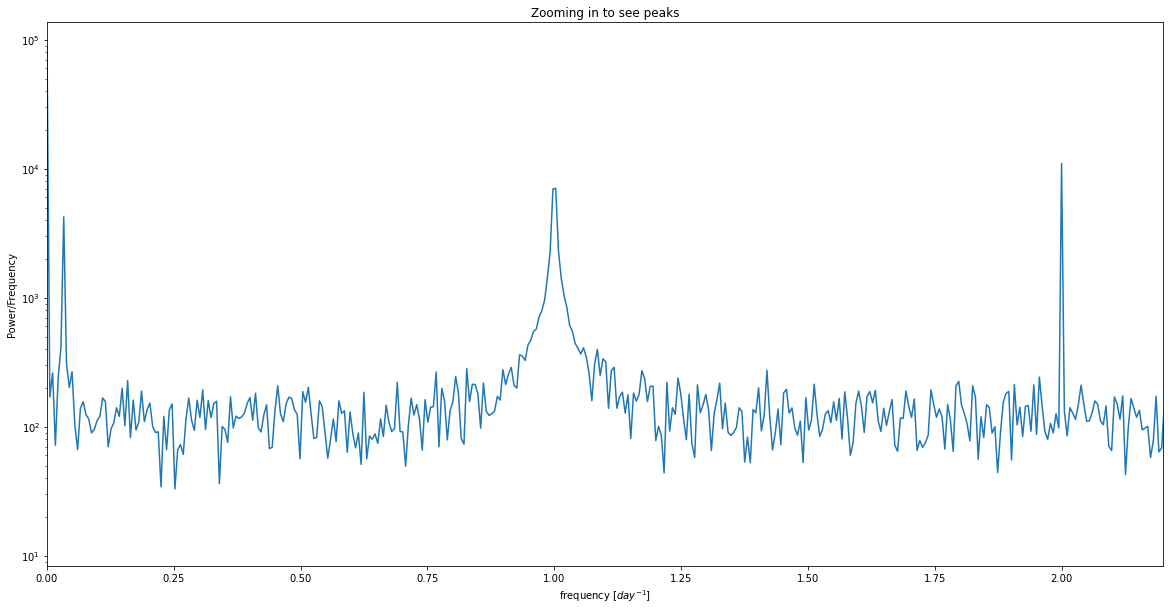

In [25]:
f,ax=plt.subplots(figsize=(20,10))
ax.plot(fwin,p_mean)
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Power/Frequency')
ax.set_xlabel('frequency [$day^{-1}$]')
ax.set_title('Zooming in to see peaks')
ax.set_xlim([0,2.2])

 ### C. From these plots, identify whether the noise associated is with this data series is red noise or white noise, and identify at what frequencies the timeseries varies. 

The noise assosciated with this dataset is likely white because it seems to not have a periodicity to it based on the spectral density graph. It looks as if the time series vaires strongly at 0.5 days, 1 day, and a weaker signal at 29.4 days.

### D. Based on what you find, where do you think this water level measurement was taken?

I think this water level measurement is ocean tide data! I think this due to the periodicity at 0.5 days, 1 day, and 29.4 days. Tides occur twice a day and cycle every day and month with extreme regularity as seen in this data. The 10-30cm range of water level and taking lower values at the end of the day and higher in the morning are also consistent with tide data. This 'tidal range' seems a bit small though for an ocean, so perhaps this is another smaller body of water connected to an ocean.

# References

Note: A large amount of this code is adapted from the CEWA 565 course materials, predominantly from the lab 8 jupyter notebook which can be found in module 8 of the class website: https://mountain-hydrology-research-group.github.io/data-analysis/modules/module8.html